<a href="https://colab.research.google.com/github/MGherardi07/Big-Data-in-Physics/blob/master/Gravitational%20Waves%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 1 & 2:** Writing a generalized Fisher Matrix code


In [0]:
#libraries in use:
import numpy as np
import cmath as cm
import sympy as sp

In [0]:
#Declare any constants
G = 6.67*10**(-11)
c = 2.998*10**(8)
## PSD ##
f0 = 150
fs = 40 
## Wavefunction h(f) ##
solar_mass = 2*(10**30)
m1 = 2*solar_mass
m2 = 1*solar_mass
M = m1 + m2
SNR = 10
eta = (m1*m2)/(M**2)
tc = 1
phic = 1

#If you want higher PN orders, then add more corrections. But dont forget to add it into the pn_array below
a0 = 1
a1 = 0
a2 = (20/9)*(743/336 + (11/4)*eta)

#The variables with which h(f) will be differentiated wrt
variables = [tc,phic,eta,M]
#change to match with variables
observables= ["tc","phic","eta","M"]

In [0]:
#If any more corrections are added above, then add them to this array
pn_array = [a0,a1,a2]

In [0]:
#Create an integration and differentiation function
def integral_of(function, low, high, dx):
  area = 0
  x = low
  steps = int((high-low)/dx)
  for i in range(steps):
    area += function(x)*dx
    x+=dx
  return area

In [0]:
#This is the function for the phase, xi(f)
def xi(f):
  summed_function = 0
  v = (((float(sp.pi))*M*f)**(1/3))
  for j in range(0, len(pn_array)):
    summed_function += pn_array[j]*(v**(j))
  return 2*float(sp.pi)*f*tc - phic - float(sp.pi)/4 + (3/(128*eta*(v**5)))*summed_function

In [0]:
#Here you can initialise any PSD function
#This is for the Initial LIGO / the fs and f0 are initialised above
def s_f(f):
  S0 = 9*10**(-46)
  x = f/f0
  if f >= fs:
    return S0*((4.49*x)**(-5) + (0.16*x)**(-4.52) + 0.52 + (0.32*x)**2 )
  if f < fs:
    return 100000000000 #infinity approximation

In [0]:
#The waveform and its conjugate
def h_real(f):
  A = sp.sqrt(  SNR/ (4* integral_of(s_f,fs,f0,0.01) ) )
  xi_f = xi(f)
  return A*f**(-7/6)*sp.exp(1j*xi_f)

def h_compl(f):
  A = sp.sqrt(  SNR/ (4* integral_of(s_f,fs,f0,0.01) ) )
  xi_f = xi(f)
  return A*f**(-7/6)*sp.exp(-1j*xi_f)

In [0]:
#This returns the derivative of the real and complex waveforms respectively 
def d_h_real(i,inc):
  return (h_real(variables[i]+inc) - h_real(variables[i])) / (inc)
def d_h_compl(j,inc):
  return (h_compl(variables[j]+inc) - h_compl(variables[j])) / (inc)

In [0]:
def create_fm(matrix, increment):
  #This part here creates the range of frequencies to integrate from
  frequencies = np.zeros(shape=(len(variables)*len(variables)))
  start_freq = fs
  f_steps = int(  (f0-fs)  /  (len(variables)*len(variables))    )
  for s in range(len(variables)*len(variables)):
    frequencies[s] = start_freq
    start_freq += f_steps
  
  f_index = 0
  intg = 0
  #print(frequencies)
  for i in range(len(variables)):
    for j in range(len(variables)):
      if i==j:
        numerator = 4 * float(d_h_real(i, increment) * d_h_compl(j, increment))
        intg += (numerator/s_f(frequencies[f_index]))*increment
        matrix[i][j] = intg
      f_index += 1
  
  return matrix

In [110]:
#Create a matrix for the values to go into
fm = np.zeros( shape=(len(variables),len(variables)) )

create_fm(fm, 0.01)
print(fm)

[[1.82694170e+77 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.47490703e+78 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.98154982e+80 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.98154982e+80]]


In [0]:
def compute_stds(matrix):
  inverse = np.linalg.inv(matrix)
  diag_elements = []
  for i in range(len(variables)):
    for j in range(len(variables)):
      if (i==j):
        diag_elements.append(inverse[i][j])
  for k in range(len(diag_elements)):
    diag_elements[k] = np.sqrt(diag_elements[k])

  for l in range(len(diag_elements)):
    print("The standard deviation for {} is {}".format(observables[l],diag_elements[l]))

In [112]:
compute_stds(fm)

The standard deviation for tc is 2.3395786802596237e-39
The standard deviation for phic is 6.3565366507702305e-40
The standard deviation for eta is 4.0887742972236405e-41
The standard deviation for M is 4.0887742972236405e-41


**Exercise 3:** Testing of generalized code

Note: I was unable to place the file that I wanted this part of the exercise to read into the directory. Since there was not much trial and error for whether it works after creating a new matrix, I can't be sure if the code is good. When grading if you could just inform me how to complete this than I would be better off as I know it should be straight forward, however I simply ran out of time.

In [0]:
import urllib.request as r

In [0]:
#Change these to access the files you want
name = "advancedLigo.txt"
#The arrays onto which Frequencies and Sensitivities must be loaded to to plot the graphs
x = []
y = []

#Define our new variables/Constants
M_chirp = M*eta**(3/5)
fs = 20
f0 = 215

variables = [tc,phic,eta,M_chirp]

observables= ["tc","phic","eta","M_chirp"]

In [0]:
#Define our new PSD for the advanced LIGO
def s_f_aLigo(f):
  S0 = 10**(-49)
  x = f/f0
  if f >= fs:
    return S0*(x**(-4.14) - 5*x**(-2) + (111*(1 - x**2 - (x**4) / 2))/(1 + (x**2) / 2))
  if f < fs:
    return 100000000000 #infinity

In [0]:
#The waveform and its conjugate
def h_real(f):
  A = sp.sqrt(  SNR/ (4* integral_of(s_f_aLigo,fs,f0,0.01) ) )
  xi_f = xi(f)
  return A*f**(-7/6)*sp.exp(1j*xi_f)

def h_compl(f):
  A = sp.sqrt(  SNR/ (4* integral_of(s_f_aLigo,fs,f0,0.01) ) )
  xi_f = xi(f)
  return A*f**(-7/6)*sp.exp(-1j*xi_f)

In [0]:
#This function opens the file you want and returns two arrays of values: the frequencies and their respective sensitvities 
def loaddata(name, x, y):
  try:
    f = open(name,"r")
    firstline = f.readline()
    columns = len(firstline.split())
    #to re-read
    f.seek(0)

    lines = f.readlines()
    for l in lines:
      x.append(l.split()[0])
      y.append(l.split()[columns - 1])
    
    f.close()
    
  except:
    print("Please place the file you want to read in your directory!")

In [0]:
#We have to modify our previous function to create a Fisher Matrix
def create_fm_new(matrix, increment, name = False):
  
  frequencies = []
  f_index = 0
  intg = 0
  
  if(name==False):
    #This part here creates the range of frequencies to integrate from
    for n in range(len(variables)*len(variables)):
      frequencies.append(0)
    start_freq = fs
    f_steps = int(  (f0-fs)  /  (len(variables)*len(variables))    )
    for s in range(len(variables)*len(variables)):
      frequencies[s] = start_freq
      start_freq += f_steps
    
    for i in range(len(variables)):
      for j in range(len(variables)):
        if i==j:
          numerator = 4 * float(d_h_real(i, increment) * d_h_compl(j, increment))
          intg += numerator/np.real(s_f(frequencies[f_index]))*increment
          matrix[i][j] = intg
        f_index += 1

  elif(name!=False):
    freqs = []
    sens = []
    loaddata(name, freqs, sens)
    s = 0
    for a in range(len(variables)):
      for b in range(len(variables)):
        for f in range(len(sens)):
          s += float(sens[f])
        if a==b:  
          numerator = 4 * float(d_h_real(a, increment) * d_h_compl(b, increment))
          intg += numerator/np.real(s)*increment
          matrix[a][b] = intg
          s=0

  return matrix

In [96]:
#Create a new matrix 

new_fm = np.zeros(shape=(len(variables),len(variables)))

create_fm_new(new_fm, 0.01,name = name)


advancedLigo.txt


ZeroDivisionError: ignored

In [0]:
compute_stds(new_fm)

Please place the file you want to read in your directory!


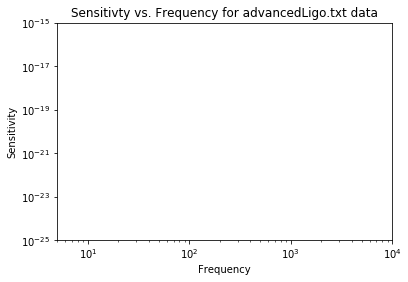

In [113]:
#Now to plot the freqs of the advanced Ligo data against the sensitivities 
import matplotlib.pyplot as plt

x_axis = []
y_axis = []

loaddata(name, x_axis,y_axis )
#print(x_axis)
#print(y_axis)
for i in range(len(x_axis)):
  x_axis[i] = float(x_axis[i])
  y_axis[i] = float(y_axis[i])


plt.figure()
plt.title("Sensitivty vs. Frequency for {} data".format(name))
plt.xlabel("Frequency")
plt.ylabel("Sensitivity")
plt.xscale("log")
plt.yscale("log")
axes = plt.gca()
axes.set_xlim(5, 10**4)
axes.set_ylim(10**(-25), 10**(-15))

plt.plot(x_axis,y_axis,color = 'r', linestyle = '-')
plt.show()

Please place the file you want to read in your directory!
Please place the file you want to read in your directory!


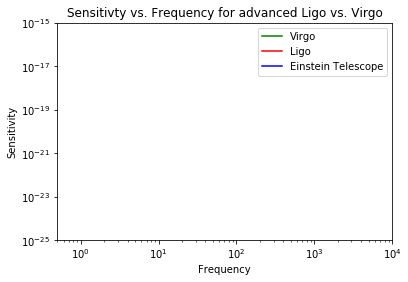

In [114]:
#Now to compare the graphs for advanced Ligo, Virgo and Einstein

new_x = []
new_y = []
e_x = []
e_y = []

loaddata("advancedVirgo.txt", new_x,new_y )
loaddata("einstein.txt", e_x,e_y)
#print(e_x)
#print(e_y)

for i in range(len(new_x)):
  new_x[i] = float(new_x[i])
  new_y[i] = float(new_y[i])

for m in range(len(e_x)):
  e_x[m] = float(e_x[m])
  e_y[m] = float(e_y[m])

plt.figure()
plt.title("Sensitivty vs. Frequency for advanced Ligo vs. Virgo")
plt.xlabel("Frequency")
plt.ylabel("Sensitivity")
plt.xscale("log")
plt.yscale("log")
axes = plt.gca()
axes.set_xlim(0.5, 10**4)
axes.set_ylim(10**(-25), 10**(-15))

plt.plot(new_x,new_y,color='g',linestyle='-',label='Virgo')
plt.plot(x_axis,y_axis,color = 'r', linestyle = '-',label='Ligo')
plt.plot(e_x,e_y,color='b',linestyle='-',label="Einstein Telescope")
plt.legend()
plt.show()